# Dataset splitting

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
t = sns.load_dataset('titanic')
t.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [3]:
t.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
# lets prepare data
tf = t.loc[:,['survived','pclass','age','sibsp','fare']]
tf.head()

,survived,pclass,age,sibsp,fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500


In [5]:
tf.shape

(891, 5)

In [6]:
tf.isna().sum()

survived      0
pclass        0
age         177
sibsp         0
fare          0
dtype: int64

In [7]:
ag = tf.age.mean()
round(ag,2)

29.7

In [8]:
# handle missing values
# to fill nan value use fillna() from pandas
tf.age.fillna(29.7,inplace=True)

In [12]:
# check after filling NaN value
tf.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
fare        0
dtype: int64

### we have clean data now lets separate input and output

In [9]:
inp = tf.iloc[:,1:]
inp[:2]

,pclass,age,sibsp,fare
0,3,22.0,1,7.2500
1,1,38.0,1,71.2833


In [10]:
out = tf.survived
out[:2]

0    0
1    1
Name: survived, dtype: int64

In [ ]:
# Strategies
# titanic.csv-->891 record
# 80% (Training) | 20%(Testing)
# 70% (Training) | 30%(Testing)

In [11]:
from sklearn.model_selection import train_test_split

In [56]:
train_inp,test_inp,train_out,test_out = train_test_split(inp,out,train_size=.8,
                                                        random_state=27)

In [57]:
train_inp[:3]

,pclass,age,sibsp,fare
129,3,45.0,0,6.9750
515,1,47.0,0,34.0208
148,2,36.5,0,26.0000


<AxesSubplot:>

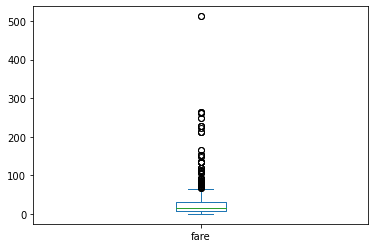

In [59]:
train_inp['fare'].plot(kind='box')

In [14]:
891*.8 #==> Training

712.8000000000001

In [15]:
891 - 712 #==>Testing

179

In [16]:
train_test_split(inp,out,train_size=.8)

[     pclass   age  sibsp      fare
 723       2  50.0      0   13.0000
 833       3  23.0      0    7.8542
 390       1  36.0      1  120.0000
 521       3  22.0      0    7.8958
 744       3  31.0      0    7.9250
 ..      ...   ...    ...       ...
 697       3  29.7      0    7.7333
 571       1  53.0      2   51.4792
 204       3  18.0      0    8.0500
 617       3  26.0      1   16.1000
 694       1  60.0      0   26.5500
 
 [712 rows x 4 columns],
      pclass   age  sibsp      fare
 260       3  29.7      0    7.7500
 264       3  29.7      0    7.7500
 122       2  32.5      1   30.0708
 595       3  36.0      1   24.1500
 306       1  29.7      0  110.8833
 ..      ...   ...    ...       ...
 619       2  26.0      0   10.5000
 668       3  43.0      0    8.0500
 812       2  35.0      0   10.5000
 495       3  29.7      0   14.4583
 748       1  19.0      1   53.1000
 
 [179 rows x 4 columns],
 723    0
 833    0
 390    1
 521    0
 744    1
       ..
 697    1
 571    1
 2

In [17]:
len(train_inp)

712

In [18]:
len(test_inp)

179

# Training Phase

In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_inp,train_out)

MultinomialNB()

### Before testing we can also check goodness of Data

In [37]:
mnb.score(train_inp,train_out)*100

69.3820224719101

In [38]:
mnb.score(test_inp,test_out)*100

69.27374301675978

In [21]:
mnb.score(inp,out)*100

69.47250280583613

## Prediction/Testing

In [23]:
mnb.predict(test_inp)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [27]:
test_out.values

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [28]:
mnb.predict(train_inp)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [30]:
train_out.values

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [82]:
train_inp[train_inp['fare']>500]

,pclass,age,sibsp,fare
258,1,35.0,0,512.3292


In [70]:
# remove entry at index 679
train_inp.loc[679]

pclass      1.0000
age        36.0000
sibsp       0.0000
fare      512.3292
Name: 679, dtype: float64

In [72]:
train_inp.drop(index=679,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
train_inp.shape

(711, 4)

In [76]:
train_out.drop(index=679,inplace=True)

In [77]:
len(train_inp)

711

In [78]:
len(train_out)

711

<AxesSubplot:>

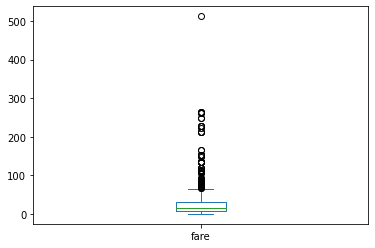

In [81]:
train_inp['fare'].plot(kind='box')

In [79]:
# create a new model
mnb2 = MultinomialNB()
mnb2.fit(train_inp,train_out)

MultinomialNB()

In [83]:
mnb2.score(train_inp,train_out)*100

68.91701828410689